# Ejercicio: Generador de Gráficos Automático

## Instrucciones:
1. Crea una clase llamada `AutoPlot`.

2. La clase debe tener tres métodos principales:
   - `univariate_plot`: para gráficos univariantes.
   - `bivariate_plot`: para gráficos bivariantes.
   - `multivariate_plot`: para gráficos multivariantes.

3. Cada método debe recibir como argumentos:
   - `data`: un DataFrame de pandas que contiene los datos.
   - `variables`: una lista de nombres de columnas.
   - `types`: una lista de tipos correspondientes a cada columna (nominal, ordinal, continuo, discreto, fecha).
   
4. Los métodos deben seleccionar y generar automáticamente el gráfico más adecuado basado en los tipos de variables.


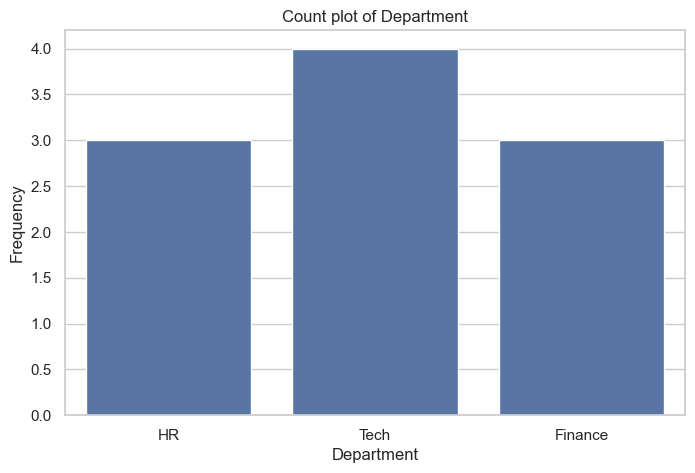

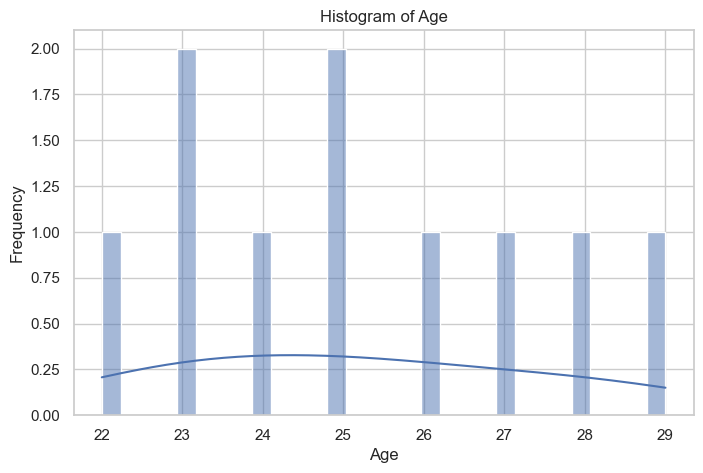

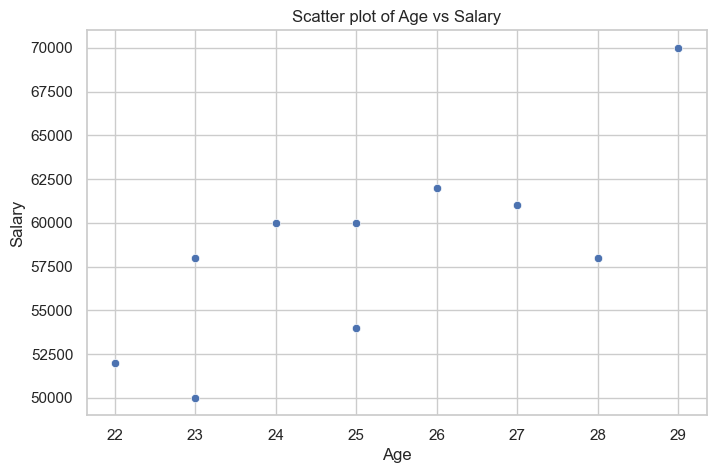

<Figure size 1000x600 with 0 Axes>

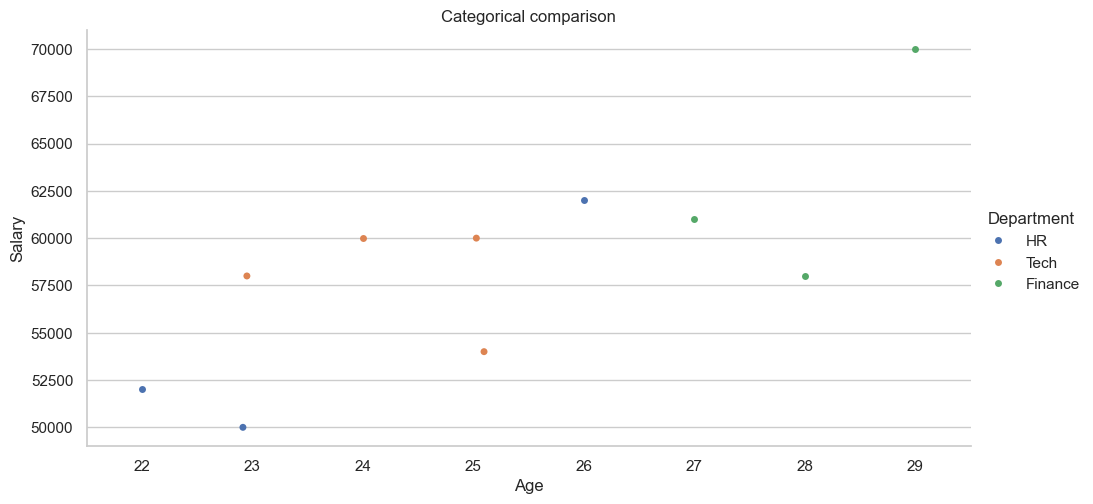

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class AutoPlot:
    
    def __init__(self):
        sns.set(style="whitegrid")

    def univariate_plot(self, data, variables, types):
        """Genera gráficos univariantes."""
        for var, var_type in zip(variables, types):
            plt.figure(figsize=(8, 5))
            if var_type in ['nominal', 'ordinal']:
                sns.countplot(data=data, x=var)
                plt.title(f'Count plot of {var}')
            elif var_type in ['continuo', 'discreto']:
                sns.histplot(data=data, x=var, bins=30, kde=True)
                plt.title(f'Histogram of {var}')
            elif var_type == 'fecha':
                sns.histplot(data=data, x=var, bins=30, kde=True)
                plt.title(f'Time Series of {var}')
            plt.xlabel(var)
            plt.ylabel('Frequency')
            plt.show()

    def bivariate_plot(self, data, variables, types):
        """Genera gráficos bivariantes."""
        if len(variables) != 2:
            raise ValueError("Se requieren exactamente 2 variables para un gráfico bivariante.")

        x_var, y_var = variables
        x_type, y_type = types

        plt.figure(figsize=(8, 5))
        
        if x_type in ['nominal', 'ordinal'] and y_type in ['continuo', 'discreto']:
            sns.boxplot(data=data, x=x_var, y=y_var)
            plt.title(f'Box plot of {y_var} by {x_var}')
        elif x_type in ['continuo', 'discreto'] and y_type in ['nominal', 'ordinal']:
            sns.boxplot(data=data, x=y_var, y=x_var)
            plt.title(f'Box plot of {x_var} by {y_var}')
        elif x_type in ['continuo', 'discreto'] and y_type in ['continuo', 'discreto']:
            sns.scatterplot(data=data, x=x_var, y=y_var)
            plt.title(f'Scatter plot of {x_var} vs {y_var}')
        elif x_type == 'fecha' or y_type == 'fecha':
            sns.lineplot(data=data, x=x_var, y=y_var)
            plt.title(f'Time series of {y_var} vs {x_var}')
        
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.show()

    def multivariate_plot(self, data, variables, types):
        """Genera gráficos multivariantes."""
        if len(variables) < 3:
            raise ValueError("Se requieren al menos 3 variables para un gráfico multivariante.")
        
        plt.figure(figsize=(10, 6))
        
        if all(t in ['continuo', 'discreto'] for t in types):
            sns.pairplot(data[variables], diag_kind='kde')
            plt.title('Pairplot of continuous/discrete variables')
        else:
            # Si hay variables categóricas, usar FacetGrid
            if any(t in ['nominal', 'ordinal'] for t in types):
                sns.catplot(data=data, x=variables[0], y=variables[1], hue=variables[2], kind='strip', height=5, aspect=2)
                plt.title('Categorical comparison')
        
        plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    # Crear un DataFrame de ejemplo
    data = pd.DataFrame({
        'Age': [23, 25, 22, 23, 24, 26, 28, 25, 27, 29],
        'Salary': [50000, 54000, 52000, 58000, 60000, 62000, 58000, 60000, 61000, 70000],
        'Department': ['HR', 'Tech', 'HR', 'Tech', 'Tech', 'HR', 'Finance', 'Tech', 'Finance', 'Finance'],
    })
    
    # Crear una instancia de AutoPlot
    plotter = AutoPlot()
    
    # Gráfico univariante
    plotter.univariate_plot(data, ['Department', 'Age'], ['nominal', 'continuo'])
    
    # Gráfico bivariante
    plotter.bivariate_plot(data, ['Age', 'Salary'], ['continuo', 'continuo'])
    
    # Gráfico multivariante
    plotter.multivariate_plot(data, ['Age', 'Salary', 'Department'], ['continuo', 'continuo', 'nominal'])
